In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py


In [2]:
path = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(path, encoding="ISO-8859-1")
df.head()

C:\Users\rangg\AppData\Local\Temp\ipykernel_9348\4202513134.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding="ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Dibawah ini kita bisa melihat jumlah serangan teroris yang terjadi antara tahun 2014 dan 1970. Terlihat jika 2014 merupakan tahun dengan jumlah serangan paling banyak, dan paling sedikit di 1971.

In [39]:
counts = df['iyear'].value_counts()             #Hitung jumlah kejadian serangan tiap tahun
print(counts)

mean = counts.mean()                            #Hitung rata rata
print("\nJumlah rata rata serangan per tahun", mean)

median = df['iyear'].median()                   #Hitung median
print("Median ada di tahun : ",median)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

Jumlah rata rata serangan per tahun 3865.7659574468084
Median ada di tahun :  2009.0


Dibawah ini kita bisa melihat deskripsi data yang kita miliki, terlihat bahwa mulai dari tahun 2000-an, jumlah serangan mulai meningkat perlahan-lahan. Ini juga tervalidasi oleh median diatas yang memberikan 2009, yang mengindikasikan bahwa bahkan separuh dari jumlah serangan terjadi diatas 2009.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


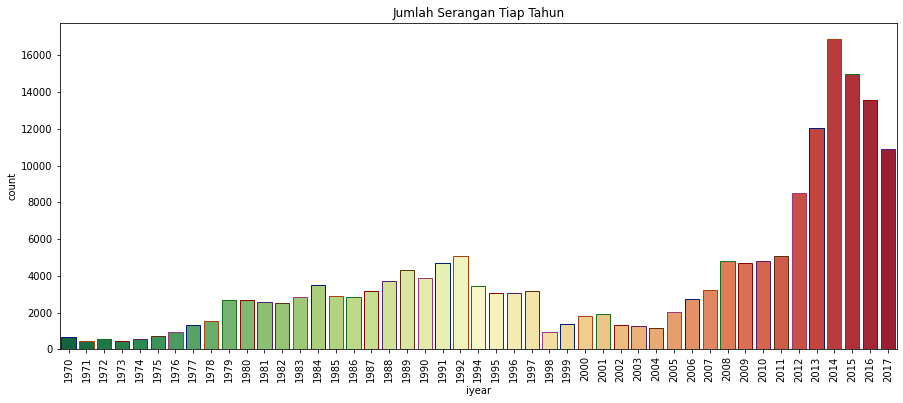

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Jumlah Serangan Tiap Tahun')
plt.show()

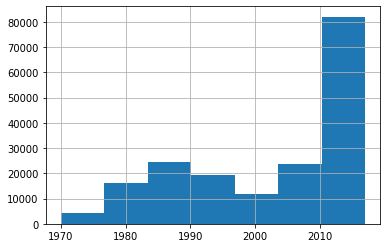

In [41]:
hist = df['iyear'].hist(bins=7)

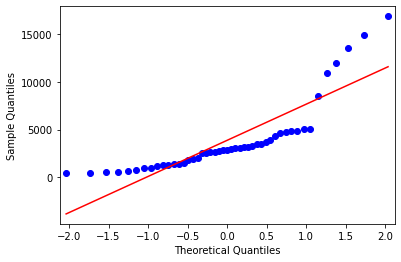

In [42]:
points = df['iyear'].value_counts()

sm.qqplot(points, line ='s')
py.show()

##Dibawah ini kita mengamati serangan teroris berdasarkan wilayah serangannya.
Terlihat jika Timur Tengah (middle east) dan afrika utara adalah wilayah dengan
frekuensi serangan teroris tertinggi, tepat diatas Asia selatan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


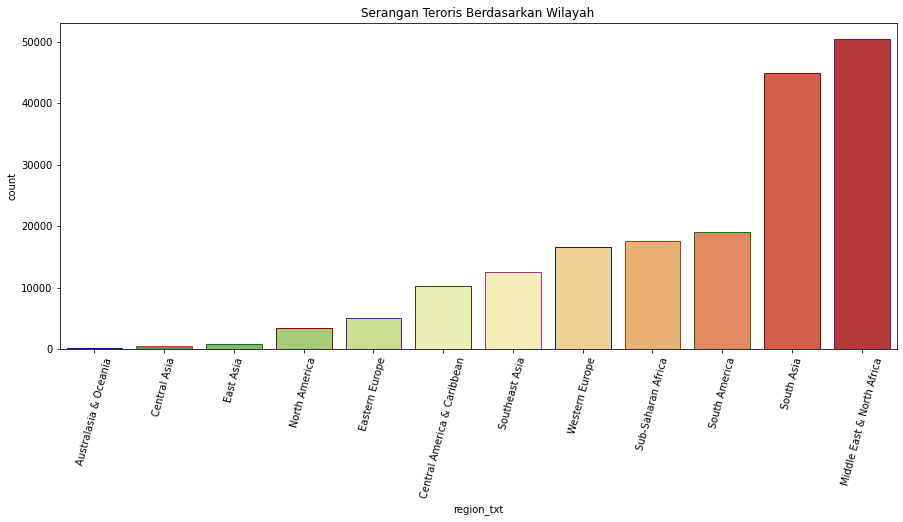

In [43]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7),order=df['region_txt'].value_counts().index[::-1])
plt.xticks(rotation=75)
plt.title('Serangan Teroris Berdasarkan Wilayah')
plt.show()

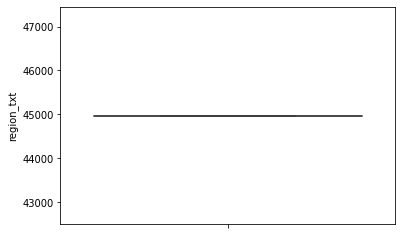

In [44]:
sns.boxplot(y=df[df['region_txt'] =='South Asia']['region_txt'].value_counts())
plt.show()

##Sekarang mari kita lihat kelompok teror manakah yang paling sering melancarkan serangan.

In [45]:
gname=df[df['gname']!='Unknown']['gname'].value_counts() #Tidak mengambil unknown
gname

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
                                                    ... 
Ansar Sarallah                                         1
Sword of Islam                                         1
Support of Ocalan-The Hawks of Thrace                  1
Arab Revolutionary Front                               1
MANO-D                                                 1
Name: gname, Length: 3536, dtype: int64

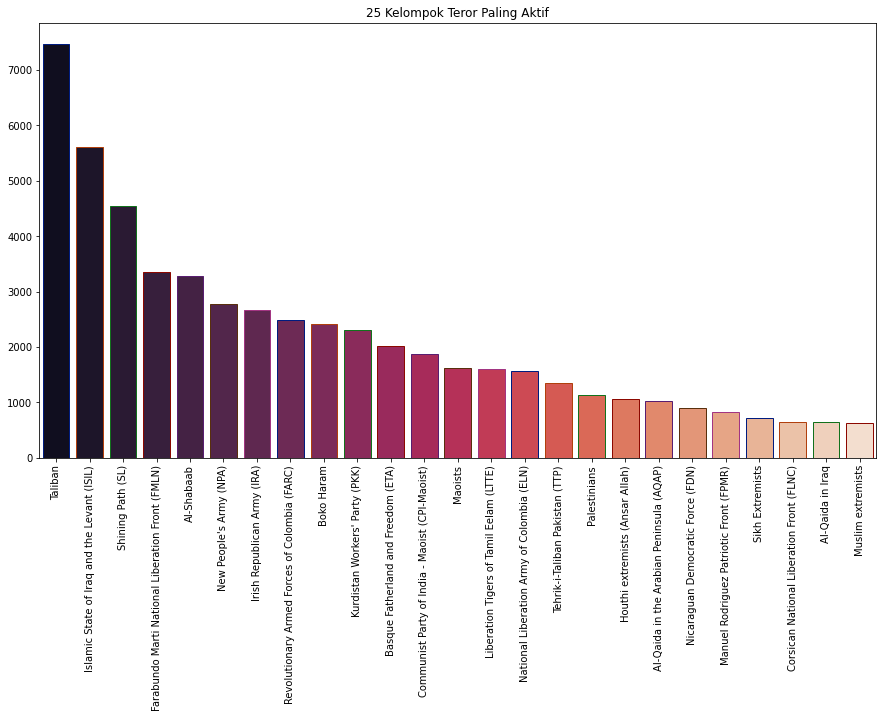

In [46]:
top_25=gname.head(25)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_25.index, y=top_25.values,palette='rocket',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('25 Kelompok Teror Paling Aktif')
plt.show()

Terlihat diatas bahwa kelompok yang paling aktif memang berada di daerah timur tengah dan afrika, seperti Taliban, Islamic State (ISIS/ISIL), Al-Shabaab dan Boko Haram.

Terakhir kita akan coba menggunakan boxplot untuk melihat jumlah korban yang ada setiap tahunnya.

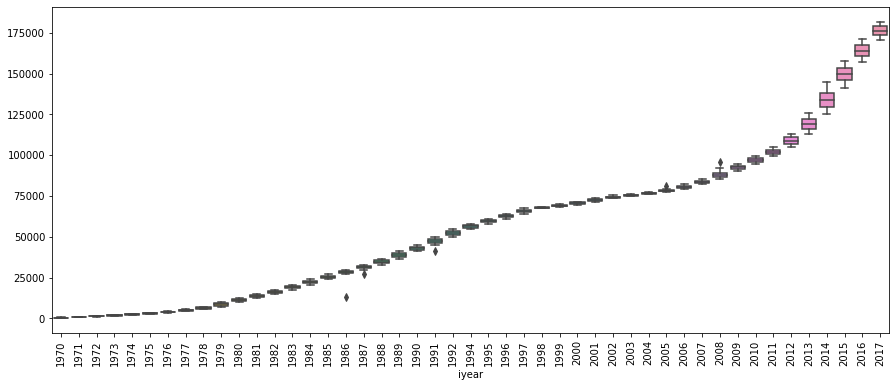

In [47]:
plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
sns.boxplot(data=df, y=df['nkill'].index, x = 'iyear')
plt.show()